# Transfer Learning on all mushrooms

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from keras.applications.mobilenet import MobileNet, decode_predictions, preprocess_input
from keras import preprocessing
from tensorflow.keras.preprocessing import image
import keras.backend as K
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,InputLayer,Dropout

Oyster GIF

In [26]:
from PIL import Image

# Define the path to the directory containing the PNG images
path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\oyster'

# Get a list of all the PNG images in the directory
png_images = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.png')]

# Open each image using the Pillow library
images = [Image.open(image) for image in png_images]

# Save the images as frames of the GIF
images[0].save('output.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

Green oyster GIF

In [4]:
from PIL import Image

# Define the path to the directory containing the PNG images
path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\green_oyster'

# Get a list of all the PNG images in the directory
png_images = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.png')]

# Open each image using the Pillow library
images = [Image.open(image) for image in png_images]

# Save the images as frames of the GIF
images[0].save('green_oyster.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

Common porecrust GIF

In [5]:
from PIL import Image

# Define the path to the directory containing the PNG images
path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\common_porecrust'

# Get a list of all the PNG images in the directory
png_images = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.png')]

# Open each image using the Pillow library
images = [Image.open(image) for image in png_images]

# Save the images as frames of the GIF
images[0].save('common_porecrust.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

Many colored polypore GIF

In [6]:
from PIL import Image

# Define the path to the directory containing the PNG images
path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\many_colored_polypore'

# Get a list of all the PNG images in the directory
png_images = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.png')]

# Open each image using the Pillow library
images = [Image.open(image) for image in png_images]

# Save the images as frames of the GIF
images[0].save('many_colored_polypore.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

Hairy bracket GIF

In [ ]:
from PIL import Image

# Define the path to the directory containing the PNG images
path = r'C:\Users\helge\spiced_projects_working folder\week9\imageclassifier-main\imageclassifier-main\week9_data\hairy_bracket'

# Get a list of all the PNG images in the directory
png_images = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.png')]

# Open each image using the Pillow library
images = [Image.open(image) for image in png_images]

# Save the images as frames of the GIF
images[0].save('hairy_bracket.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

## Transfer learning on all mushrooms

In [12]:
# folder names containing images of the things you want to classify
classes = ['oyster_all', 'green_oyster', 'common_porecrust', 'many_colored_polypore', 'hairy_bracket']
# plug in the path to your data folder
base_path = './images/folder/'

In [13]:
# define the preprocessing function that should be applied to all images
data_gen = preprocessing.image.ImageDataGenerator(   # loads data in batches from disk
    preprocessing_function=preprocess_input,
    # fill_mode='nearest',
    rotation_range=20,                               # rotate image by a random degree between -20 and 20
    # width_shift_range=0.2,                         # shift image horizontally 
    # height_shift_range=0.2,                        # shift image vertically 
    # horizontal_flip=True,                          # randomly flip image horizontally
    zoom_range=0.5,                                  # apply zoom transformation using zoom factor between 0.5 and 1.5
    # shear_range=0.2                                # shear rotates pics, but makes them be in trapezoids (as opposed to squares)
    validation_split=0.2
)

In [14]:
# a generator that returns batches of X and y arrays
train_data_gen = data_gen.flow_from_directory(      # points to dir where data lives
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=32,
        target_size=(224, 224),
    subset='training'
)

Found 2299 images belonging to 5 classes.


In [15]:
val_data_gen = data_gen.flow_from_directory(
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=32,
        target_size=(224, 224),
    subset='validation'
)

Found 573 images belonging to 5 classes.


In [16]:
train_data_gen.class_indices

{'oyster_all': 0,
 'green_oyster': 1,
 'common_porecrust': 2,
 'many_colored_polypore': 3,
 'hairy_bracket': 4}

In [17]:
classes

['oyster_all',
 'green_oyster',
 'common_porecrust',
 'many_colored_polypore',
 'hairy_bracket']

## Create CNN Model as Base Model

### 1. Select the convolutional base 

#### Using MobileNet pretrained network for transfer learning

In [18]:
K.clear_session()
base_model = MobileNet(
    weights='imagenet',
    include_top=False,                          # keep convolutional layers only
    input_shape=(224, 224, 3)
)

In [19]:
base_model.summary()                            # as expected...see above

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

### 2. Freeze the weights

In [20]:
base_model.trainable = False  # we don't want to train the base model, since this would destroy filters

## Build your "individualized" architecture for "top-layers"

### 3. Add your own dense layers on top

In [21]:
len(classes)

5

In [22]:
model = keras.Sequential()
model.add(base_model)
model.add(Flatten())  
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(classes), activation='softmax')) # TODO; Final layer with a length of 2, and softmax activation

In [23]:
model.summary()                 # Note "non-trainable" params...

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 100)               5017700   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 8,247,069
Trainable params: 5,018,205
Non-trainable params: 3,228,864
______________________________________

### 4. Compile and train

In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy, #TODO: why not binary x-entropy?
              metrics='accuracy')

# observe the validation loss and stop when it does not improve after 3 iterations
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,     # the minimum expected change in the metric used in order to be seen as an improvement
    patience=3,         # number of epochs with no improvement needed for the model to stop
    restore_best_weights=True,
    mode='min'
    )

#### Hint: Make sure, you have enough memory (RAM) on your computer. Instead, you could use Google Colab or Kaggle to run the whole script + data on the GPU ("Laufzeittyp ändern -> Hardwarebeschleuniger GPU")

In [25]:
history = model.fit(train_data_gen,
          verbose=2, 
          callbacks=[callback],
          epochs=20,
          validation_data=val_data_gen
          )

Epoch 1/20
72/72 - 74s - loss: 1.1440 - accuracy: 0.8734 - val_loss: 0.0562 - val_accuracy: 0.9756 - 74s/epoch - 1s/step
Epoch 2/20
72/72 - 59s - loss: 0.1497 - accuracy: 0.9504 - val_loss: 0.1293 - val_accuracy: 0.9738 - 59s/epoch - 814ms/step
Epoch 3/20
72/72 - 58s - loss: 0.0881 - accuracy: 0.9674 - val_loss: 0.1533 - val_accuracy: 0.9721 - 58s/epoch - 802ms/step
Epoch 4/20
72/72 - 57s - loss: 0.1120 - accuracy: 0.9639 - val_loss: 0.1523 - val_accuracy: 0.9686 - 57s/epoch - 797ms/step


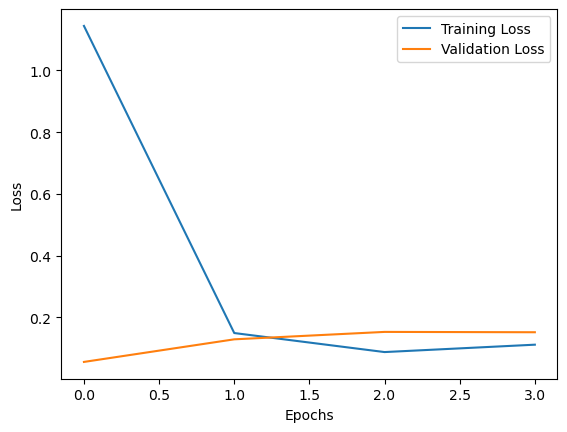

In [27]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();